In [1]:
## This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import nonlinear_superlearn_library as nonlib
from mlrefined_libraries import basics_library 

# demos for this notebook
regress_plotter = nonlib.nonlinear_regression_demos_multiple_panels
classif_plotter = nonlib.nonlinear_classification_visualizer_multiple_panels
static_plotter = optlib.static_plotter.Visualizer()
basic_runner = nonlib.basic_runner
classif_plotter_crossval = nonlib.crossval_classification_visualizer
datapath = '../../mlrefined_datasets/nonlinear_superlearn_datasets/'

# import autograd functionality to bulid function's properly for optimizers
import autograd.numpy as np

# import timer
from datetime import datetime 
import copy
import math

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>


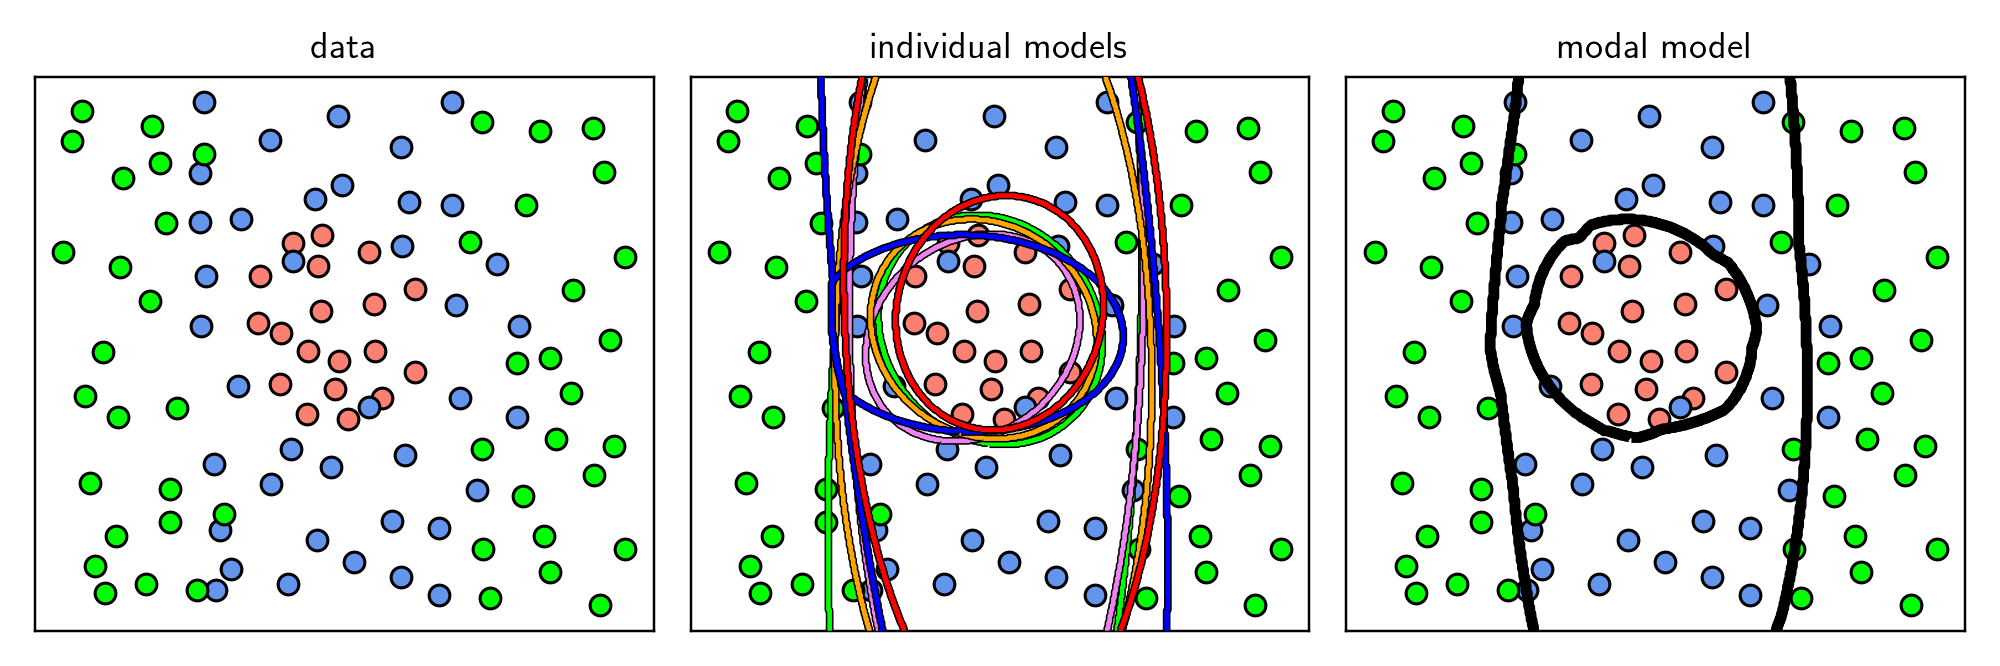

In [17]:
# This code cell will not be shown in the HTML version of this notebook
# load in dataset
csvname = datapath + '3class_egg_inside.csv'

data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# run bagg
degree = 10
num_baggs = 5
train_portion = 0.66
runs6 = []
for j in range(num_baggs):
    # initialize with input/output data
    mylib6 = nonlib.reg_lib.super_setup.Setup(x,y)

    # perform preprocessing step(s) - especially input normalization
    mylib6.preprocessing_steps(name = 'standard')
    
    # pluck out indices of current training / validation sets
    mylib6.make_train_val_split(train_portion = train_portion)
    
    # loop over models to try
    for d in range(1,degree+1):
        # choose cost
        mylib6.choose_cost(name = 'multiclass_softmax')

        # choose dimensions of fully connected multilayer perceptron layers
        mylib6.choose_features(name = 'polys',degree = d,num_classifiers = 3)
        
        # fit an optimization
        mylib6.fit(algo = 'newtons_method',max_its = 15,verbose = False,lam = 10**(-8))
        
    # keep only the best degree, based on lowest validation cost
    val_costs = [np.min(mylib6.valid_count_histories[i]) for i in range(degree)]
    min_ind = np.argmin(val_costs)
    min_val = val_costs[min_ind]
    
    # get minor of minor
    smallest_ind = np.argmin(mylib6.valid_count_histories[min_ind])
    mylib6.train_cost_histories = mylib6.train_cost_histories[min_ind][smallest_ind]
    mylib6.valid_cost_histories = mylib6.valid_cost_histories[min_ind][smallest_ind]
    mylib6.train_count_histories = mylib6.train_count_histories[min_ind][smallest_ind]
    mylib6.valid_count_histories = mylib6.valid_count_histories[min_ind][smallest_ind]
    mylib6.weight_histories = mylib6.weight_histories[min_ind][smallest_ind]
    mylib6.choose_features(name = 'polys',degree = min_ind + 1)
        
    # store 
    runs6.append(copy.deepcopy(mylib6))
    
# draw pics
demo4 = nonlib.multiclass_bagging_visualizers.Visualizer(csvname)
demo4.show_baggs(runs6)

<IPython.core.display.Javascript object>


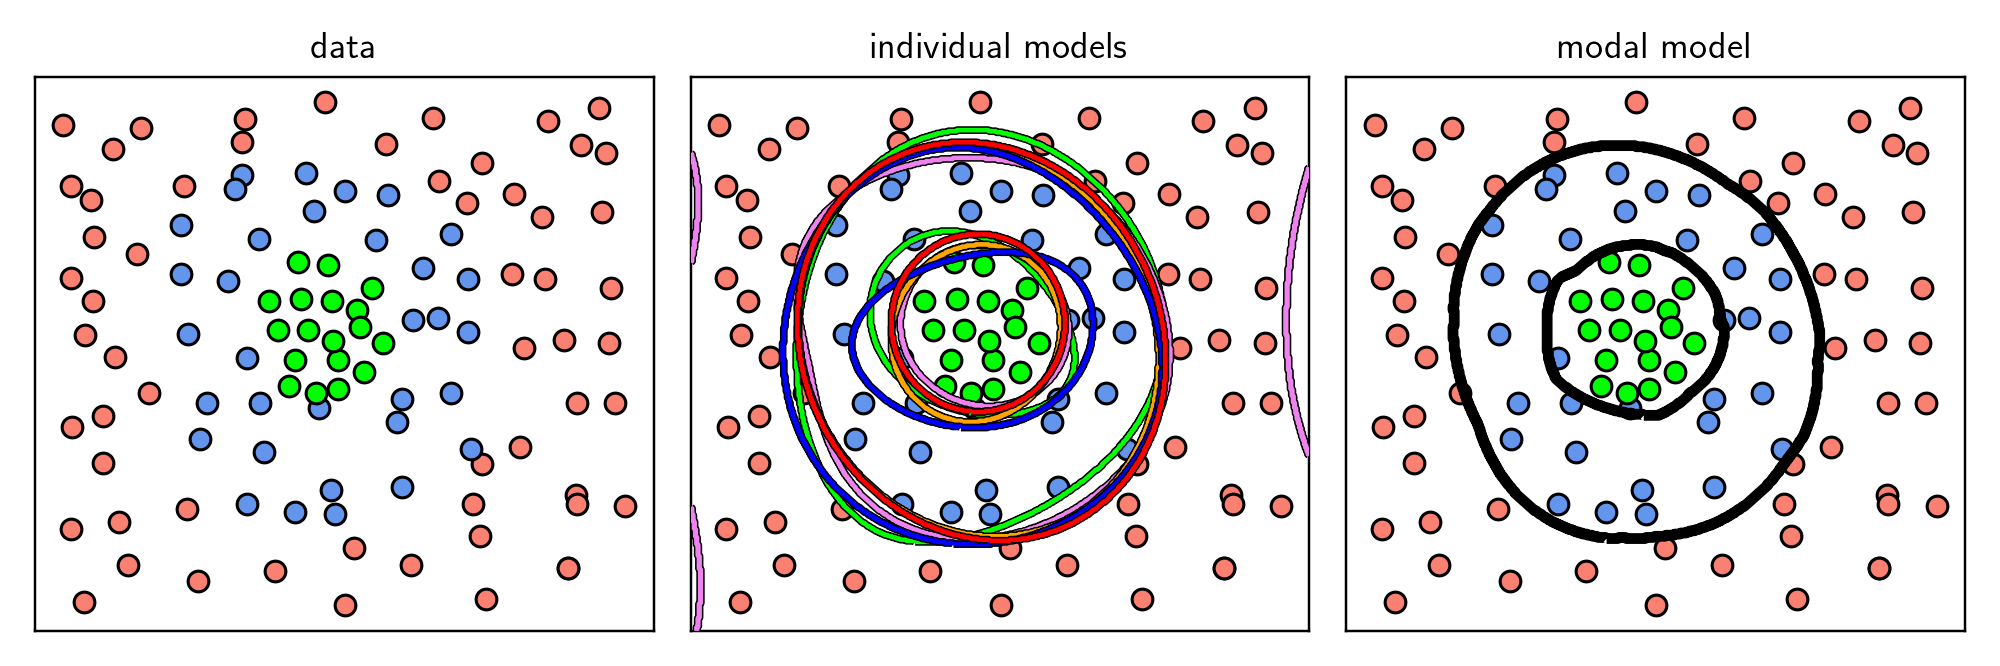

In [25]:
# This code cell will not be shown in the HTML version of this notebook
# load in dataset
csvname = datapath + '3_layercake_data.csv'

data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# run bagg
degree = 5
num_baggs = 5
train_portion = 0.8
runs6 = []
for j in range(num_baggs):
    # initialize with input/output data
    mylib6 = nonlib.reg_lib.super_setup.Setup(x,y)

    # perform preprocessing step(s) - especially input normalization
    mylib6.preprocessing_steps(name = 'standard')
    
    # pluck out indices of current training / validation sets
    mylib6.make_train_val_split(train_portion = train_portion)
    
    # loop over models to try
    for d in range(1,degree+1):
        # choose cost
        mylib6.choose_cost(name = 'multiclass_softmax')

        # choose dimensions of fully connected multilayer perceptron layers
        mylib6.choose_features(name = 'polys',degree = d,num_classifiers = 4)
        
        # fit an optimization
        mylib6.fit(algo = 'newtons_method',max_its = 5,verbose = False,lam = 10**(-6))
        
    # keep only the best degree, based on lowest validation cost
    val_costs = [np.min(mylib6.valid_count_histories[i]) for i in range(degree)]
    min_ind = np.argmin(val_costs)
    min_val = val_costs[min_ind]
    
    # get minor of minor
    smallest_ind = np.argmin(mylib6.valid_count_histories[min_ind])
    mylib6.train_cost_histories = mylib6.train_cost_histories[min_ind][smallest_ind]
    mylib6.valid_cost_histories = mylib6.valid_cost_histories[min_ind][smallest_ind]
    mylib6.train_count_histories = mylib6.train_count_histories[min_ind][smallest_ind]
    mylib6.valid_count_histories = mylib6.valid_count_histories[min_ind][smallest_ind]
    mylib6.weight_histories = mylib6.weight_histories[min_ind][smallest_ind]
    mylib6.choose_features(name = 'polys',degree = min_ind + 1)
        
    # store 
    runs6.append(copy.deepcopy(mylib6))
    
# draw pics
demo4 = nonlib.multiclass_bagging_visualizers.Visualizer(csvname)
demo4.show_baggs(runs6)

# Generate random data

<IPython.core.display.Javascript object>


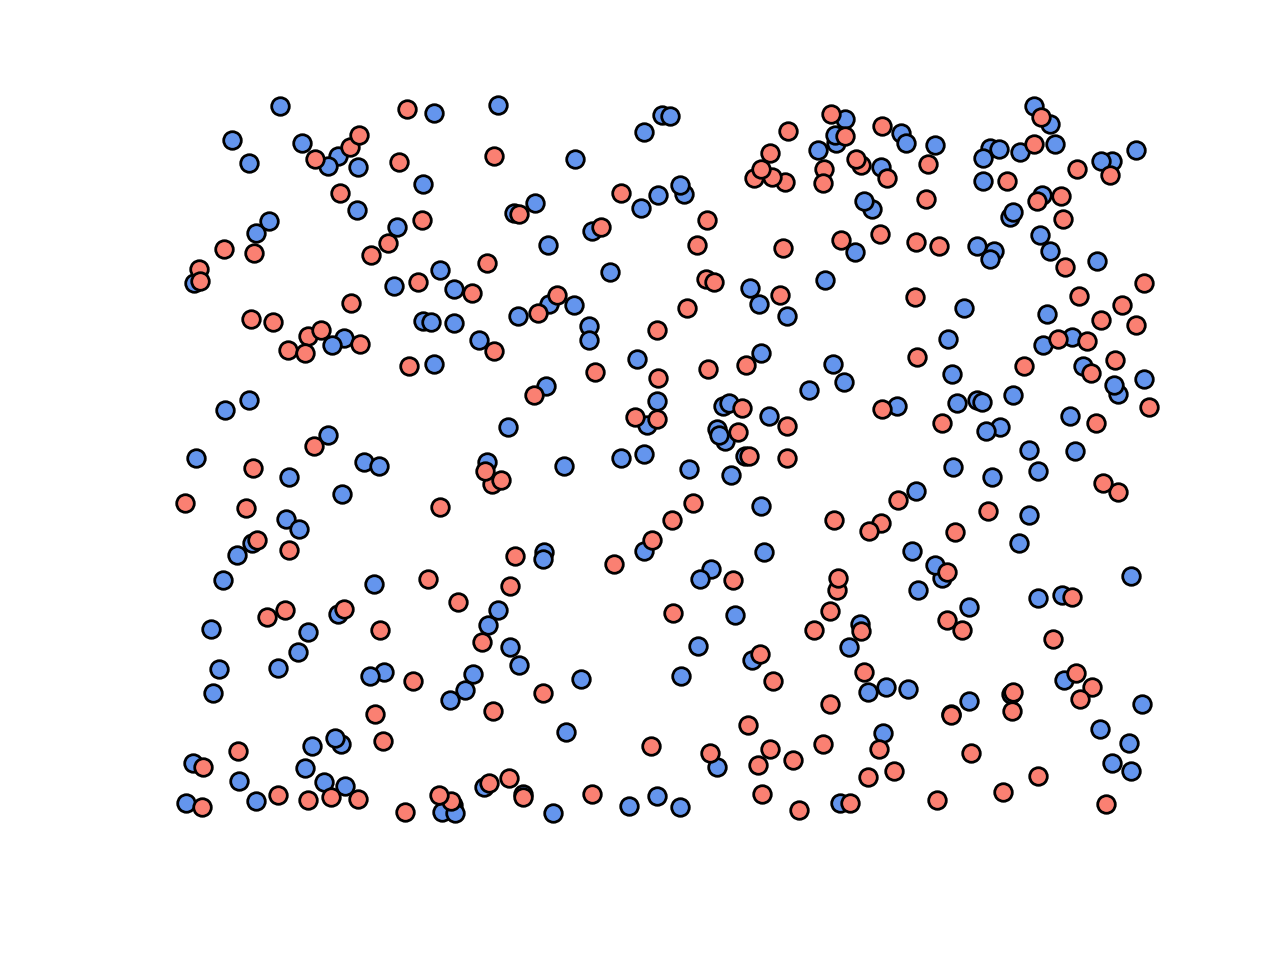

In [2]:
import matplotlib.pyplot as plt

# generate a toy classification dataset completely jumbled up
x = np.random.rand(2,400)
y = np.sign(np.random.randn(400))[np.newaxis,:]
ind = np.argwhere(y == +1)
ind = [s[1] for s in ind]
ind2 = np.argwhere(y == -1)
ind2 = [s[1] for s in ind2]

# plot toy dataset
plt.scatter(x[0,ind],x[1,ind],color = 'cornflowerblue',s = 40,linewidth = 1,edgecolor = 'k')
plt.scatter(x[0,ind2],x[1,ind2],color = 'salmon',s = 40, linewidth = 1,edgecolor = 'k')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])

# clean up plot
plt.axis('off')
plt.show()

In [50]:
new_data = np.vstack((x,y))
np.savetxt(csvname,new_data,delimiter = ',')

In [147]:
# load in dataset
csvname = datapath + 'random_2class.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# run bagg
degree = 15
num_baggs = 1
train_portion = 0.8
runs6 = []
for j in range(num_baggs):
    # initialize with input/output data
    mylib6 = nonlib.reg_lib.super_setup.Setup(x,y)

    # perform preprocessing step(s) - especially input normalization
    mylib6.preprocessing_steps(name = 'standard')
    
    # pluck out indices of current training / validation sets
    mylib6.make_train_val_split(train_portion = train_portion)
    
    # loop over models to try
    for d in range(1,degree+1):
        print (d)
        # choose cost
        mylib6.choose_cost(name = 'softmax')

        # choose dimensions of fully connected multilayer perceptron layers
        mylib6.choose_features(name = 'polys',degree = d)

        # fit an optimization
        #mylib6.fit(algo = 'newtons_method',max_its = 5,verbose = False,lam = 10**(-8),epsilon=10**(-3))
        
        mylib6.fit(algo = 'gradient_descent',max_its = 1000,verbose = False,alpha_choice = 10**(-1))

    # keep only the best degree, based on lowest validation cost
    val_costs = [np.min(mylib6.valid_count_histories[i]) for i in range(degree)]
    min_ind = np.argmin(val_costs)
    min_val = val_costs[min_ind]
    
    # get minor of minor
    smallest_ind = np.argmin(mylib6.valid_count_histories[min_ind])
    mylib6.train_cost_histories = mylib6.train_cost_histories[min_ind][smallest_ind]
    mylib6.valid_cost_histories = mylib6.valid_cost_histories[min_ind][smallest_ind]
    mylib6.train_count_histories = mylib6.train_count_histories[min_ind][smallest_ind]
    mylib6.valid_count_histories = mylib6.valid_count_histories[min_ind][smallest_ind]
    mylib6.weight_histories = mylib6.weight_histories[min_ind][smallest_ind]
    mylib6.choose_features(name = 'polys',degree = min_ind + 1)

    # store 
    runs6.append(copy.deepcopy(mylib6))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [148]:
runs6.append(copy.deepcopy(mylib6))

<IPython.core.display.Javascript object>


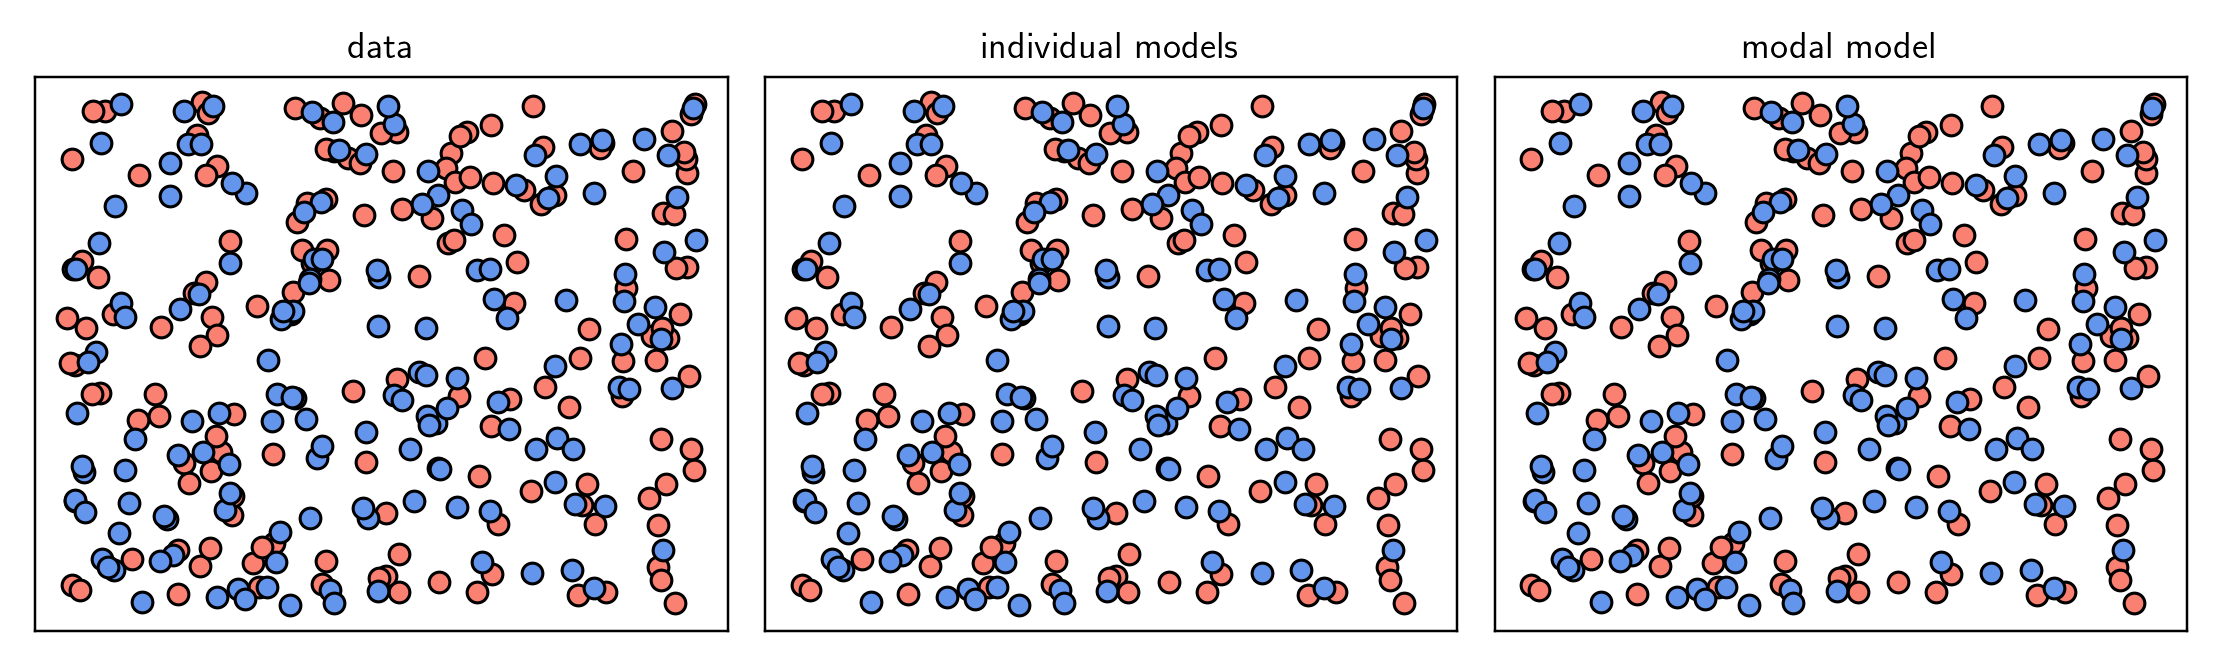

In [149]:
# draw pics
demo6 = nonlib.classification_bagging_visualizers_v2.Visualizer(csvname)
demo6.show_baggs(runs6,color_region=True)

In [139]:
w = mylib6.weight_histories
acc = 1 - mylib6.counter(w,x,y)/np.size(y)
print (acc)

0.4633333333333334


In [115]:
# generate a toy classification dataset completely jumbled up
x_test = np.random.rand(2,100)
y_test = np.sign(np.random.randn(100))[np.newaxis,:]
acc_test = 1 - mylib6.counter(w,x_test,y_test)/np.size(y_test)
print (acc_test)

0.47
